# Classification
Classification of features by their importance in separating clusters

In [103]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

## Data Loading

In [19]:
ori_data = pd.read_csv('matrix_ready.csv')

## Preprocessing

In [37]:
x = ori_data.drop(['Species', 'Sample'], axis=1)
y = ori_data.loc[:, 'Species']

In [38]:
x = StandardScaler().fit_transform(x)

## Feature selection

In [61]:
# Selection via statistics
selection = SelectKBest(k=106)
selection.fit_transform(x, y)
ksel = ori_data.drop(['Species', 'Sample'], axis=1).columns[selection.get_support()]

/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [202] are constant.
  UserWarning)
/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [48]:
# Selection via RF model
selection = SelectFromModel(RandomForestClassifier(n_estimators=100),
                            threshold="median")
selection.fit_transform(x, y)

array([[-0.42013811, -0.19035547, -0.10384273, ..., -0.25213989,
        -0.34041248, -0.40088738],
       [-0.39745767, -0.19035547, -0.17113061, ..., -0.33748891,
        -0.31062197, -0.40086706],
       [-0.42013811, -0.19035547, -0.16590056, ..., -0.33549136,
        -0.33241767, -0.40094087],
       ..., 
       [-0.42013811, -0.19035547, -0.30241139, ..., -0.48494821,
        -0.36047784, -0.39322059],
       [-0.42013811, -0.19035547, -0.30241139, ..., -0.48494821,
        -0.36500511, -0.40052446],
       [-0.42013811, -0.19035547, -0.30241139, ..., -0.48494821,
        -0.36500511, -0.40069673]])

In [58]:
rfsel = ori_data.drop(['Species', 'Sample'], axis=1).columns[selection.get_support()]
set(rfsel).union(set(ksel))

Both selection methods gives same features

In [64]:
# File with 106 important features
ksel.to_series().to_csv('important_features')

## Transformation

In [65]:
transformed = selection.fit_transform(x, y)

/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [202] are constant.
  UserWarning)
/home/arleg/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [128]:
rf = RandomForestClassifier(n_estimators=500)
params = {'max_depth': [i for i in range(3, 15)], 'min_samples_split': [i for i in range(2, 5)]}
search = GridSearchCV(rf, params, cv=3)

#### Wo transformed data

In [88]:
search.fit(x, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [89]:
search.best_score_

0.7209302325581395

#### With transformed

In [129]:
search.fit(transformed, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [130]:
search.best_score_

0.7209302325581395

In [131]:
imps = search.best_estimator_.feature_importances_

Index(['D-Galactose', '2-Butenedioic acid (E)',
       'Indeno[5,4-d]pyrano[4,3-c]isobenzofuran, 11-acetoxy-1,4,4a,6,8,8a,8b,9,10,11,11a,12,13,13a(3H)-tetradecahydro-3-oxo-6,6,11a-trimethyl-',
       'Alpha-D-Glucopyranoside-Beta-D-fructofuranosyl ', 'phenylpropane',
       'Beta-DL-Arabinopyranose', 'Acrylic acid',
       'Alpha-D-Glucopyranose-phosphate', 'Alpha-D-Glucopyranoside-methyl',
       'Arabinose',
       ...
       'Oleic acid', 'cis-11,14-Eicosadienoic-acid', 'Beta-D-Galactofuranose',
       'Butanedioic acid', 'Adipic acid, 2-ethylhexyl heptadecyl ester',
       'Scyllo-Inositol', 'D-Ribofuranose', '4',5,7-Trihydroxyflavanone',
       'D-Myo-Inositol phosphate',
       '1,2,2,4,4,5,6,6,7,7-Decamethyl-3,8-dioxa-1,2,4,5,6,7-haxasila-bicyclo[3.2.1]octane'],
      dtype='object', length=106)

In [134]:
# Collect importances of 
substances = []
importances = []
for i, (substance, value) in enumerate(zip(ksel[imps.argsort()[::-1]], np.sort(imps)[::-1])):
    print(substance, value)
    substances.append(substance)
    importances.append(value)

D-Galactose 0.0226828838343
2-Butenedioic acid (E) 0.0209336038463
Indeno[5,4-d]pyrano[4,3-c]isobenzofuran, 11-acetoxy-1,4,4a,6,8,8a,8b,9,10,11,11a,12,13,13a(3H)-tetradecahydro-3-oxo-6,6,11a-trimethyl- 0.0198876479511
Alpha-D-Glucopyranoside-Beta-D-fructofuranosyl  0.0188322993785
phenylpropane 0.0178815808715
Beta-DL-Arabinopyranose 0.0177772323563
Acrylic acid 0.0168866599149
Alpha-D-Glucopyranose-phosphate 0.0166498341618
Alpha-D-Glucopyranoside-methyl 0.0164210995632
Arabinose 0.0162506208637
Hexopyranose 0.0159584677922
2-(4'-Methoxyphenyl)-2-(3'-methyl-4'methoxyphenyl)propane 0.014804983614
3-Hydroxy-4,4,6a,8a,11,11,14b-heptamethyl-1,3,4,4a,5,6,6a,7,8,8a,9,10,11,12,12a,14,14a,14b-octadecahydro-2H-picen-13-one 0.0147286208759
L-Valine 0.0146875031593
Butanedioic acid-dimethyl ester, [S-(R*,R*)] 0.0146113236454
1-Silacyclopentadiene, 3-(diethylboryl)-4-ethyl-1,1-dimethyl-2-(3-methylbutyl)-5-trimethylstannyl- 0.0145474057402
DL-Malic acid 0.0142942760077
Pregnan-11-one(3-alpha,5-bet

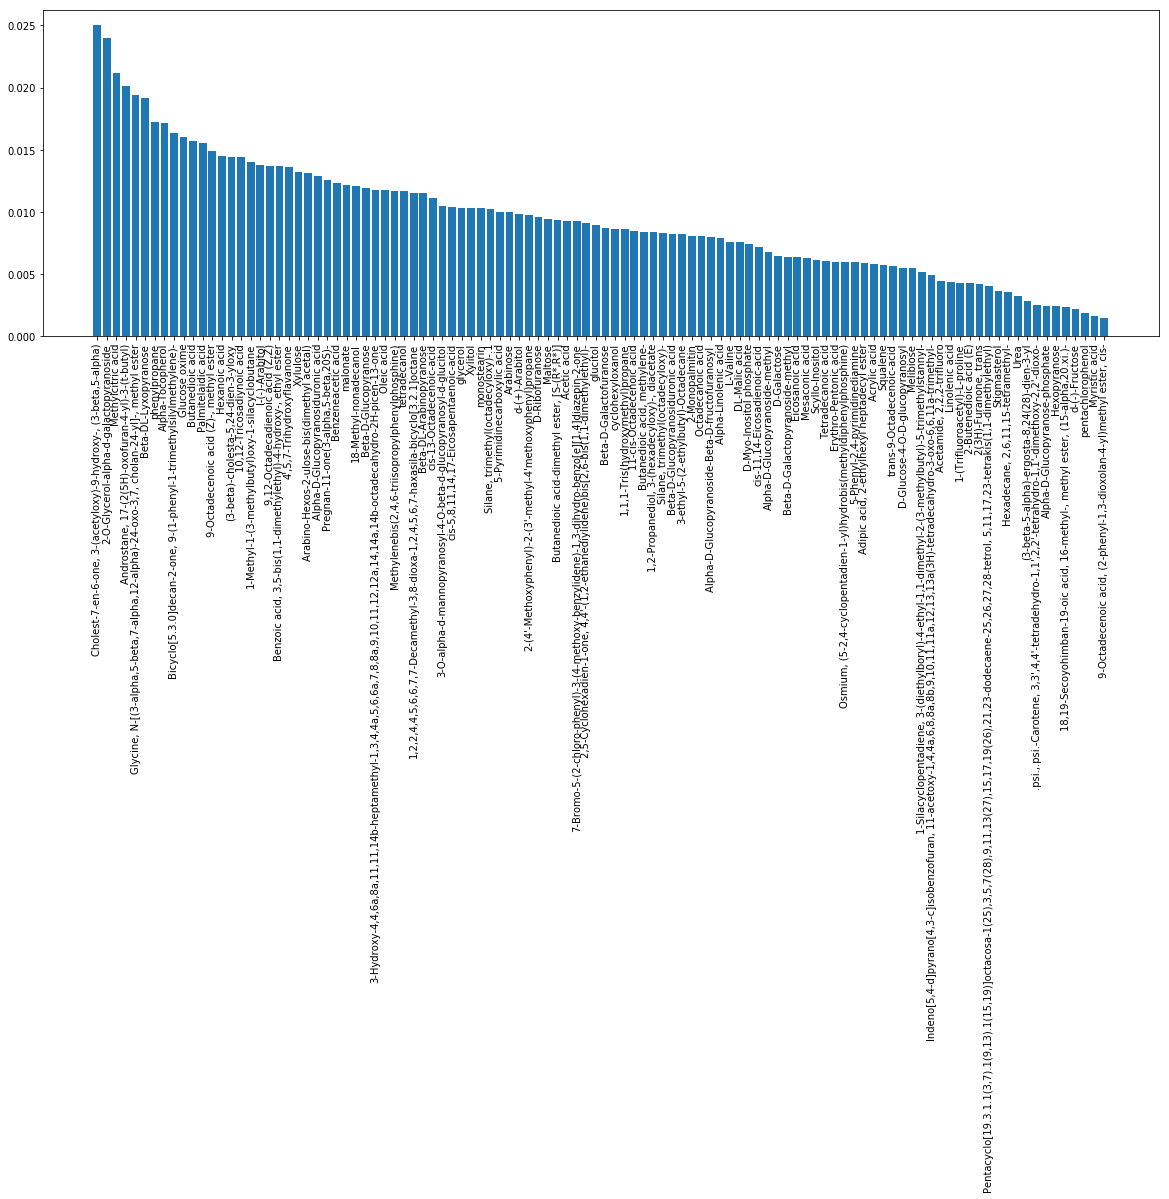

In [182]:
plt.figure(figsize=(20, 6))
plt.bar(np.arange(106), np.sort(imps)[::-1])
plt.xticks(np.arange(106), ksel[imps.argsort()[::-1]], rotation=90)
plt.savefig('feature_imp_full', bbox_inches='tight')

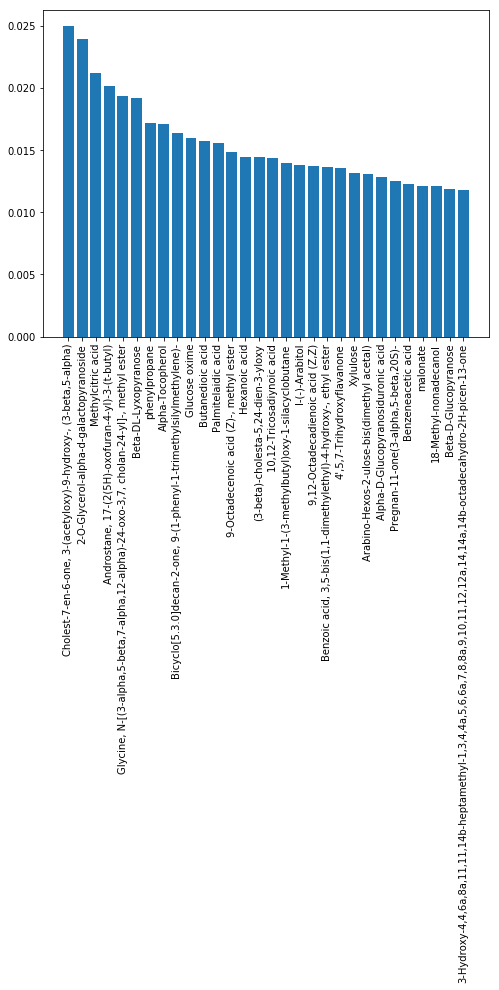

In [183]:
plt.figure(figsize=(8, 6))
plt.bar(np.arange(30), np.sort(imps)[::-1][:30])
plt.xticks(np.arange(30), ksel[imps.argsort()[::-1]][:30], rotation=90)
plt.savefig('feature_imp_30', bbox_inches='tight')

## Recursive feature selection

In [160]:
selection = RFE(RandomForestClassifier(n_estimators=100),
                n_features_to_select=106)

In [161]:
transformed = selection.fit_transform(x, y)

In [164]:
selection.get_support()

array([False,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
       False,  True, False,  True, False, False, False, False, False,
        True,  True, False, False, False, False,  True, False, False,
       False,  True,  True,  True,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False,  True,
       False, False, False, False,  True,  True, False,  True,  True,
        True, False, False,  True, False, False,  True,  True, False,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False,  True, False,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False, False,

In [165]:
rf = RandomForestClassifier(n_estimators=500)
params = {'max_depth': [i for i in range(3, 15)], 'min_samples_split': [i for i in range(2, 5)]}
search = GridSearchCV(rf, params, cv=3)

In [167]:
search.fit(transformed, y)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [170]:
rec_sel = ori_data.drop(['Species', 'Sample'], axis=1).columns[selection.get_support()]

In recursive feature elimination subset of features differ from previous methods

In [177]:
rec_sel.to_series().to_csv('recursive_features')

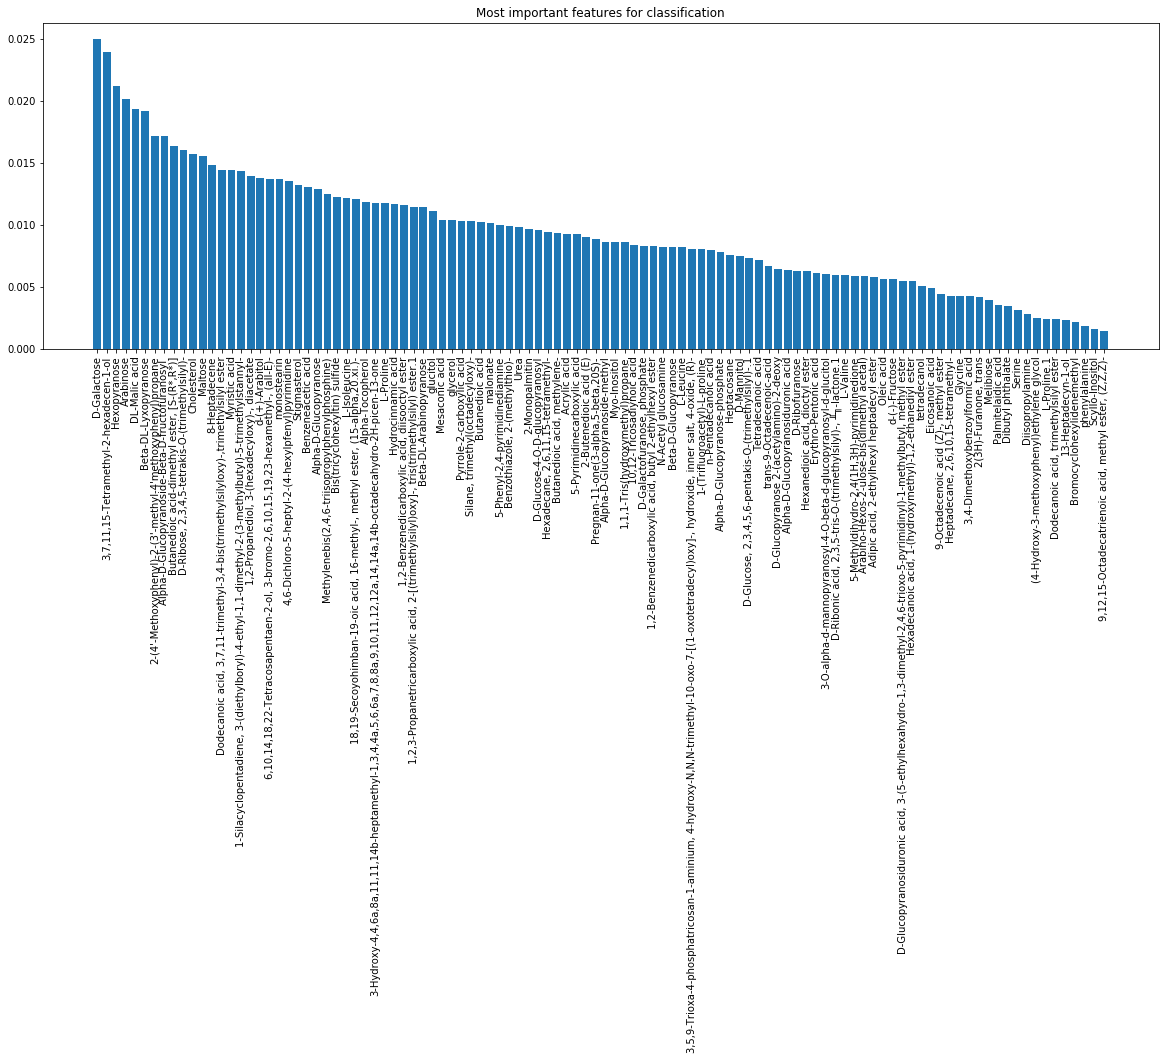

In [184]:
imps = search.best_estimator_.feature_importances_
xs = np.arange(106)

plt.figure(figsize=(20, 6))
plt.bar(xs, np.sort(imps)[::-1])
plt.xticks(xs, rec_sel[imps.argsort()[::-1]], rotation=90)
plt.title('Most important features for classification')
plt.savefig('feature_imp_full', bbox_inches='tight')

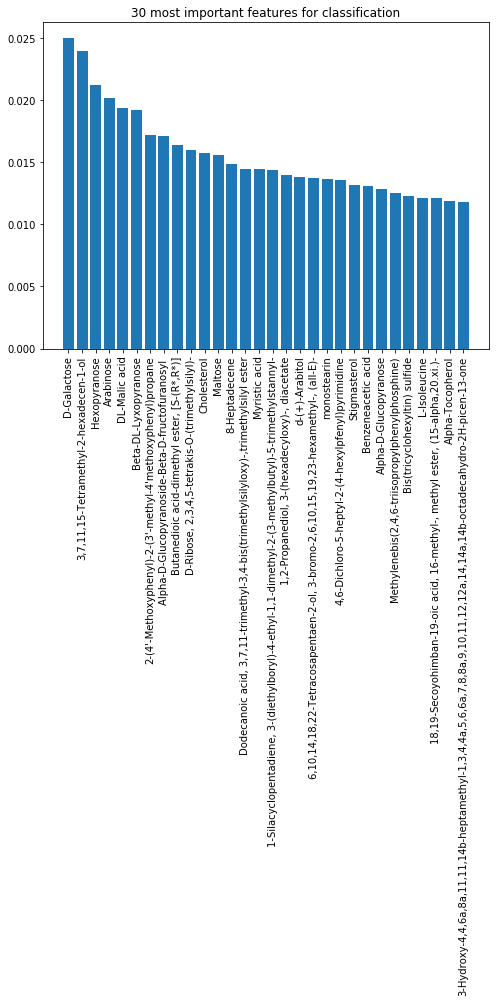

In [185]:
xs = np.arange(30)

plt.figure(figsize=(8, 6))
plt.bar(xs, np.sort(imps)[::-1][:30])
plt.xticks(xs, rec_sel[imps.argsort()[::-1][:30]], rotation=90)
plt.title('30 most important features for classification')
plt.savefig('feature_imp_full', bbox_inches='tight')